## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv("QueryResults.csv")

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
print(df.head())
print(df.tail())

                     m   TagName  Unnamed: 2
0  2008-07-01 00:00:00        c#           3
1  2008-08-01 00:00:00  assembly           8
2  2008-08-01 00:00:00         c          82
3  2008-08-01 00:00:00        c#         503
4  2008-08-01 00:00:00       c++         164
                        m TagName  Unnamed: 2
2756  2025-02-01 00:00:00     php         438
2757  2025-02-01 00:00:00  python        2599
2758  2025-02-01 00:00:00       r         579
2759  2025-02-01 00:00:00    ruby          61
2760  2025-02-01 00:00:00   swift         390


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
df.shape

(2761, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
df.count()

m             2761
TagName       2761
Unnamed: 2    2761
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [6]:
df.loc[df['Unnamed: 2'].idxmax()]

m             2020-05-01 00:00:00
TagName                    python
Unnamed: 2                  29339
Name: 1959, dtype: object

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [7]:
df.groupby("TagName")["Unnamed: 2"].sum()


TagName
assembly        45025
c              407486
c#            1624562
c++            813548
delphi          52411
go              74290
java          1919806
javascript    2532080
perl            68310
php           1467953
python        2212012
r              510569
ruby           229332
swift          336264
Name: Unnamed: 2, dtype: int64

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [8]:
type(df['m'][0])

str

In [9]:
df.m = pd.to_datetime(df.m)
if pd.api.types.is_datetime64_any_dtype(df.m):
    print("True")
else:
    print("False")

True


In [10]:
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation



In [11]:
reshaped_df = df.pivot(index='m', columns='TagName', values='Unnamed: 2')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [12]:
reshaped_df.shape

(200, 14)

In [13]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TagName')

In [14]:
reshaped_df.head()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1640.0,753.0,104.0,NaN,1122.0,630.0,129.0,474.0,534.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1985.0,805.0,112.0,NaN,1145.0,720.0,128.0,603.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,953.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [15]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.count()
reshaped_df.isna().values.any()

np.False_

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

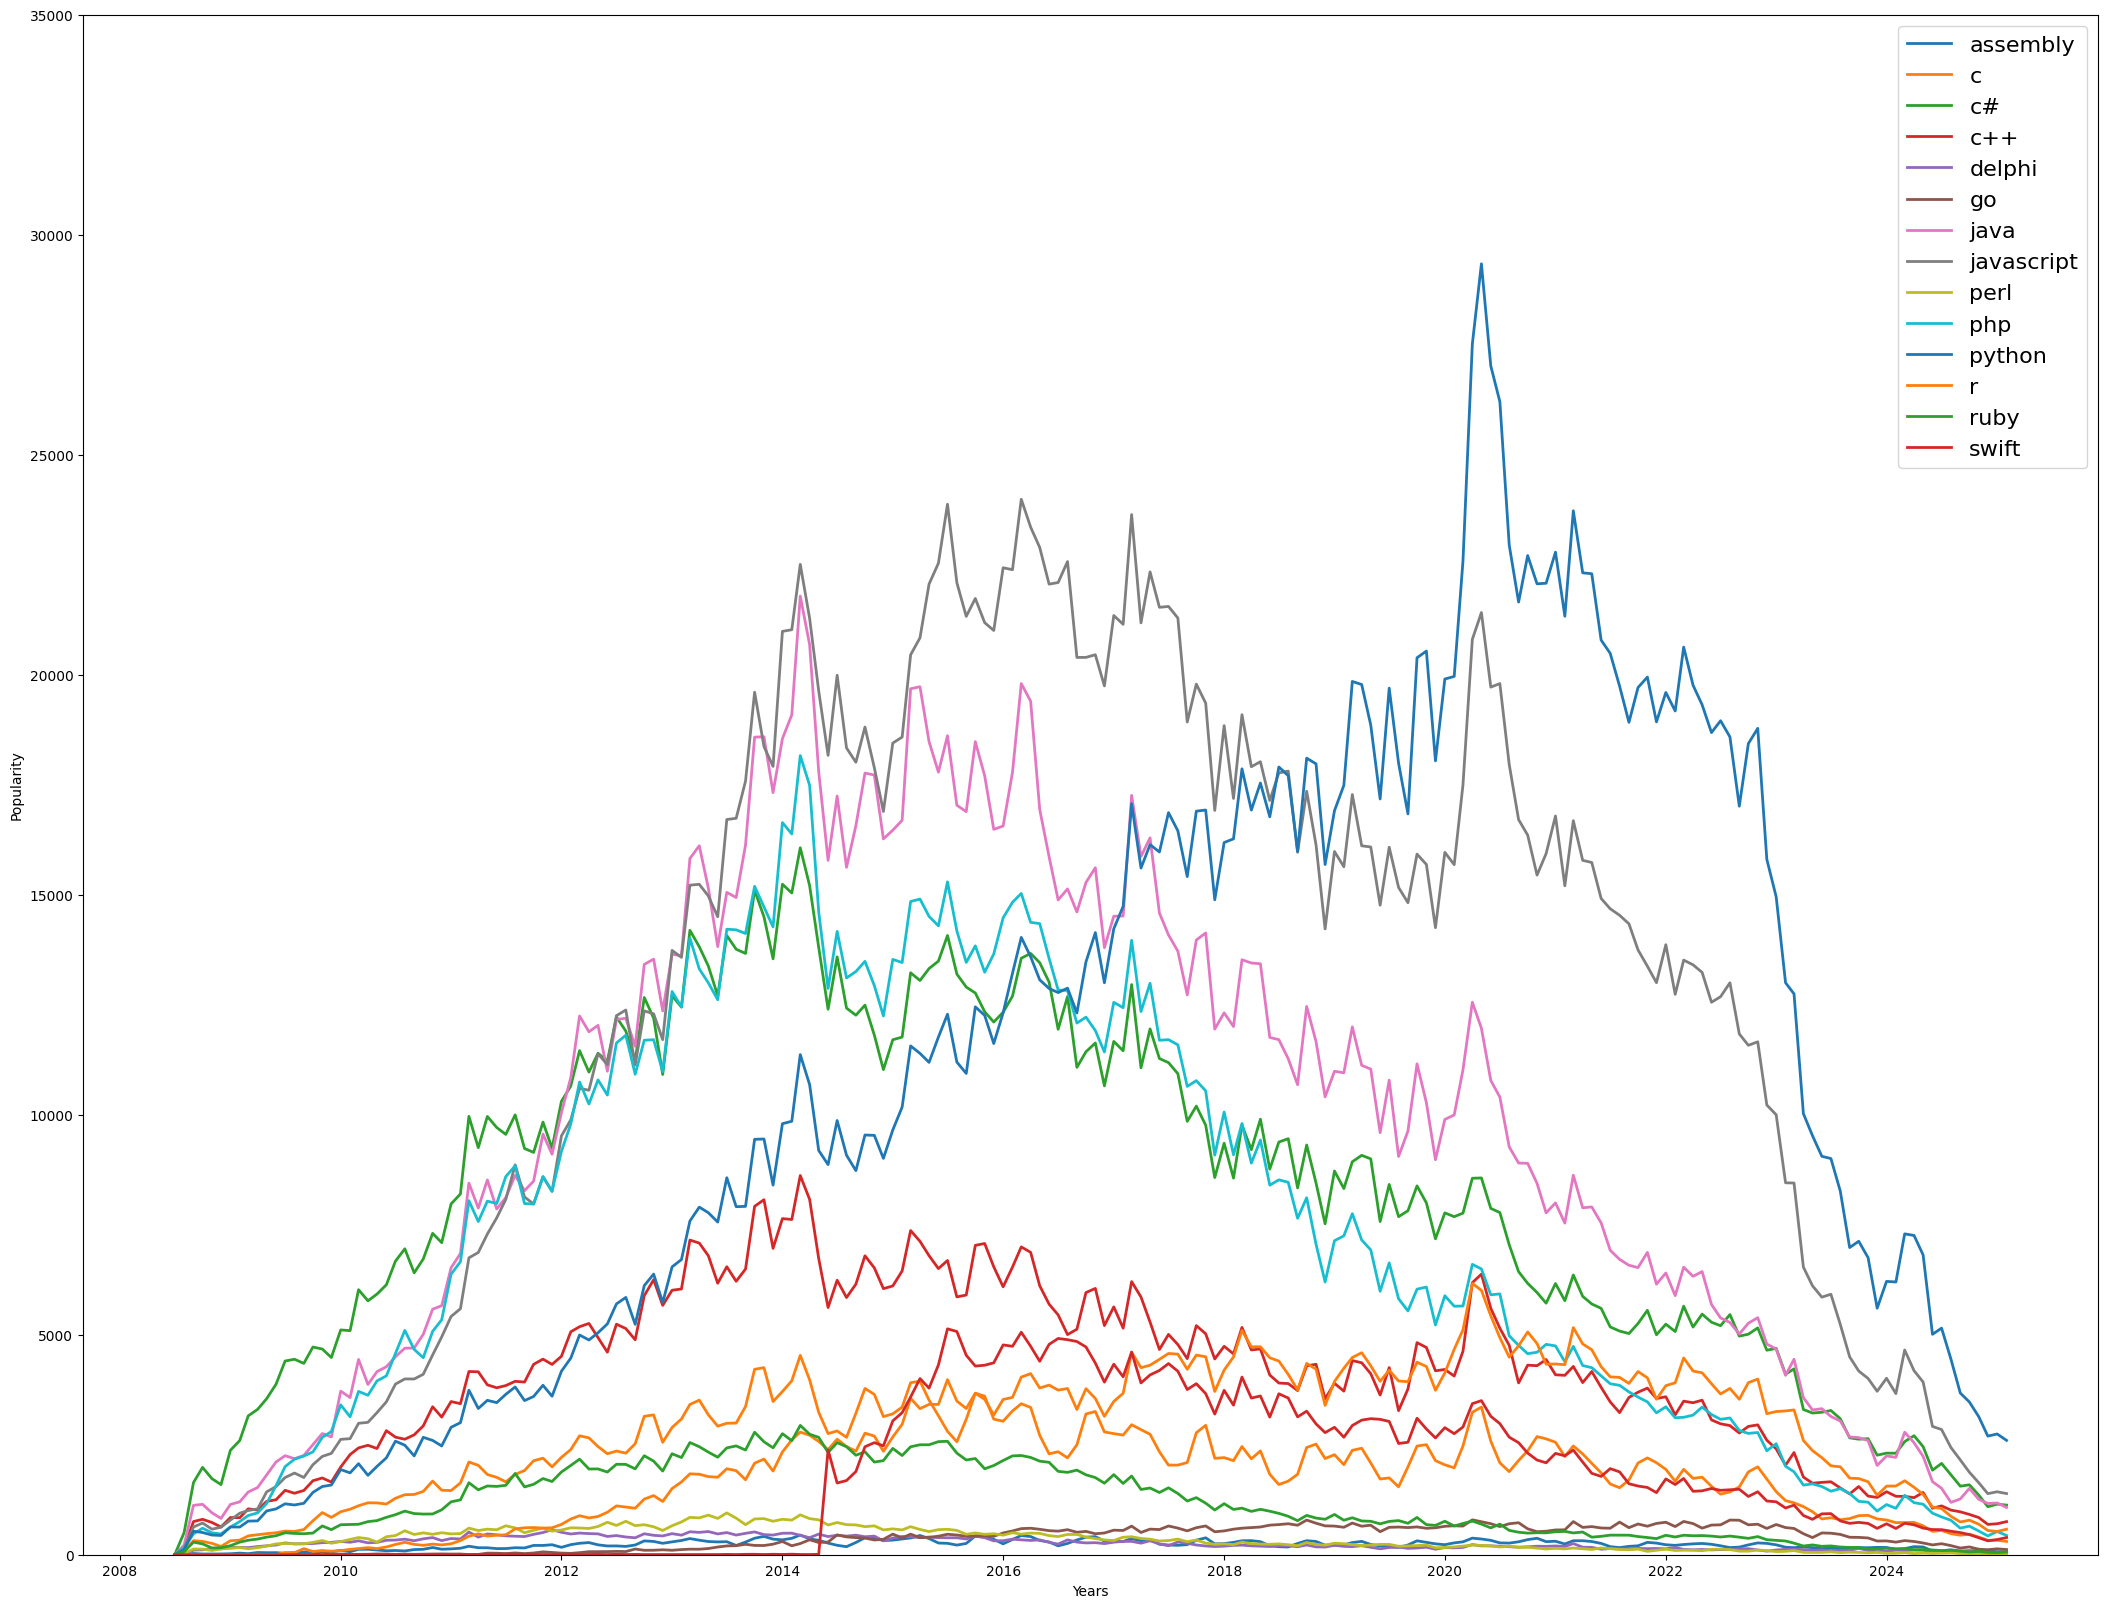

In [16]:
plt.figure(figsize=(26, 20))

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=2, label=reshaped_df[column].name)

plt.xlabel("Years")
plt.ylabel("Popularity")
plt.ylim(0, 35000)
plt.legend(fontsize=16)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

TagName       assembly           c           c#          c++     delphi  \
m                                                                         
2008-07-01         NaN         NaN          NaN          NaN        NaN   
2008-08-01         NaN         NaN          NaN          NaN        NaN   
2008-09-01         NaN         NaN          NaN          NaN        NaN   
2008-10-01         NaN         NaN          NaN          NaN        NaN   
2008-11-01         NaN         NaN          NaN          NaN        NaN   
...                ...         ...          ...          ...        ...   
2024-10-01  106.000000  521.166667  1902.833333  1081.000000  75.833333   
2024-11-01   92.833333  478.500000  1719.333333   986.000000  68.500000   
2024-12-01   94.000000  444.833333  1581.000000   924.833333  64.333333   
2025-01-01   90.166667  407.333333  1426.666667   857.166667  64.666667   
2025-02-01   82.666667  378.000000  1311.666667   813.500000  61.666667   

TagName             go  

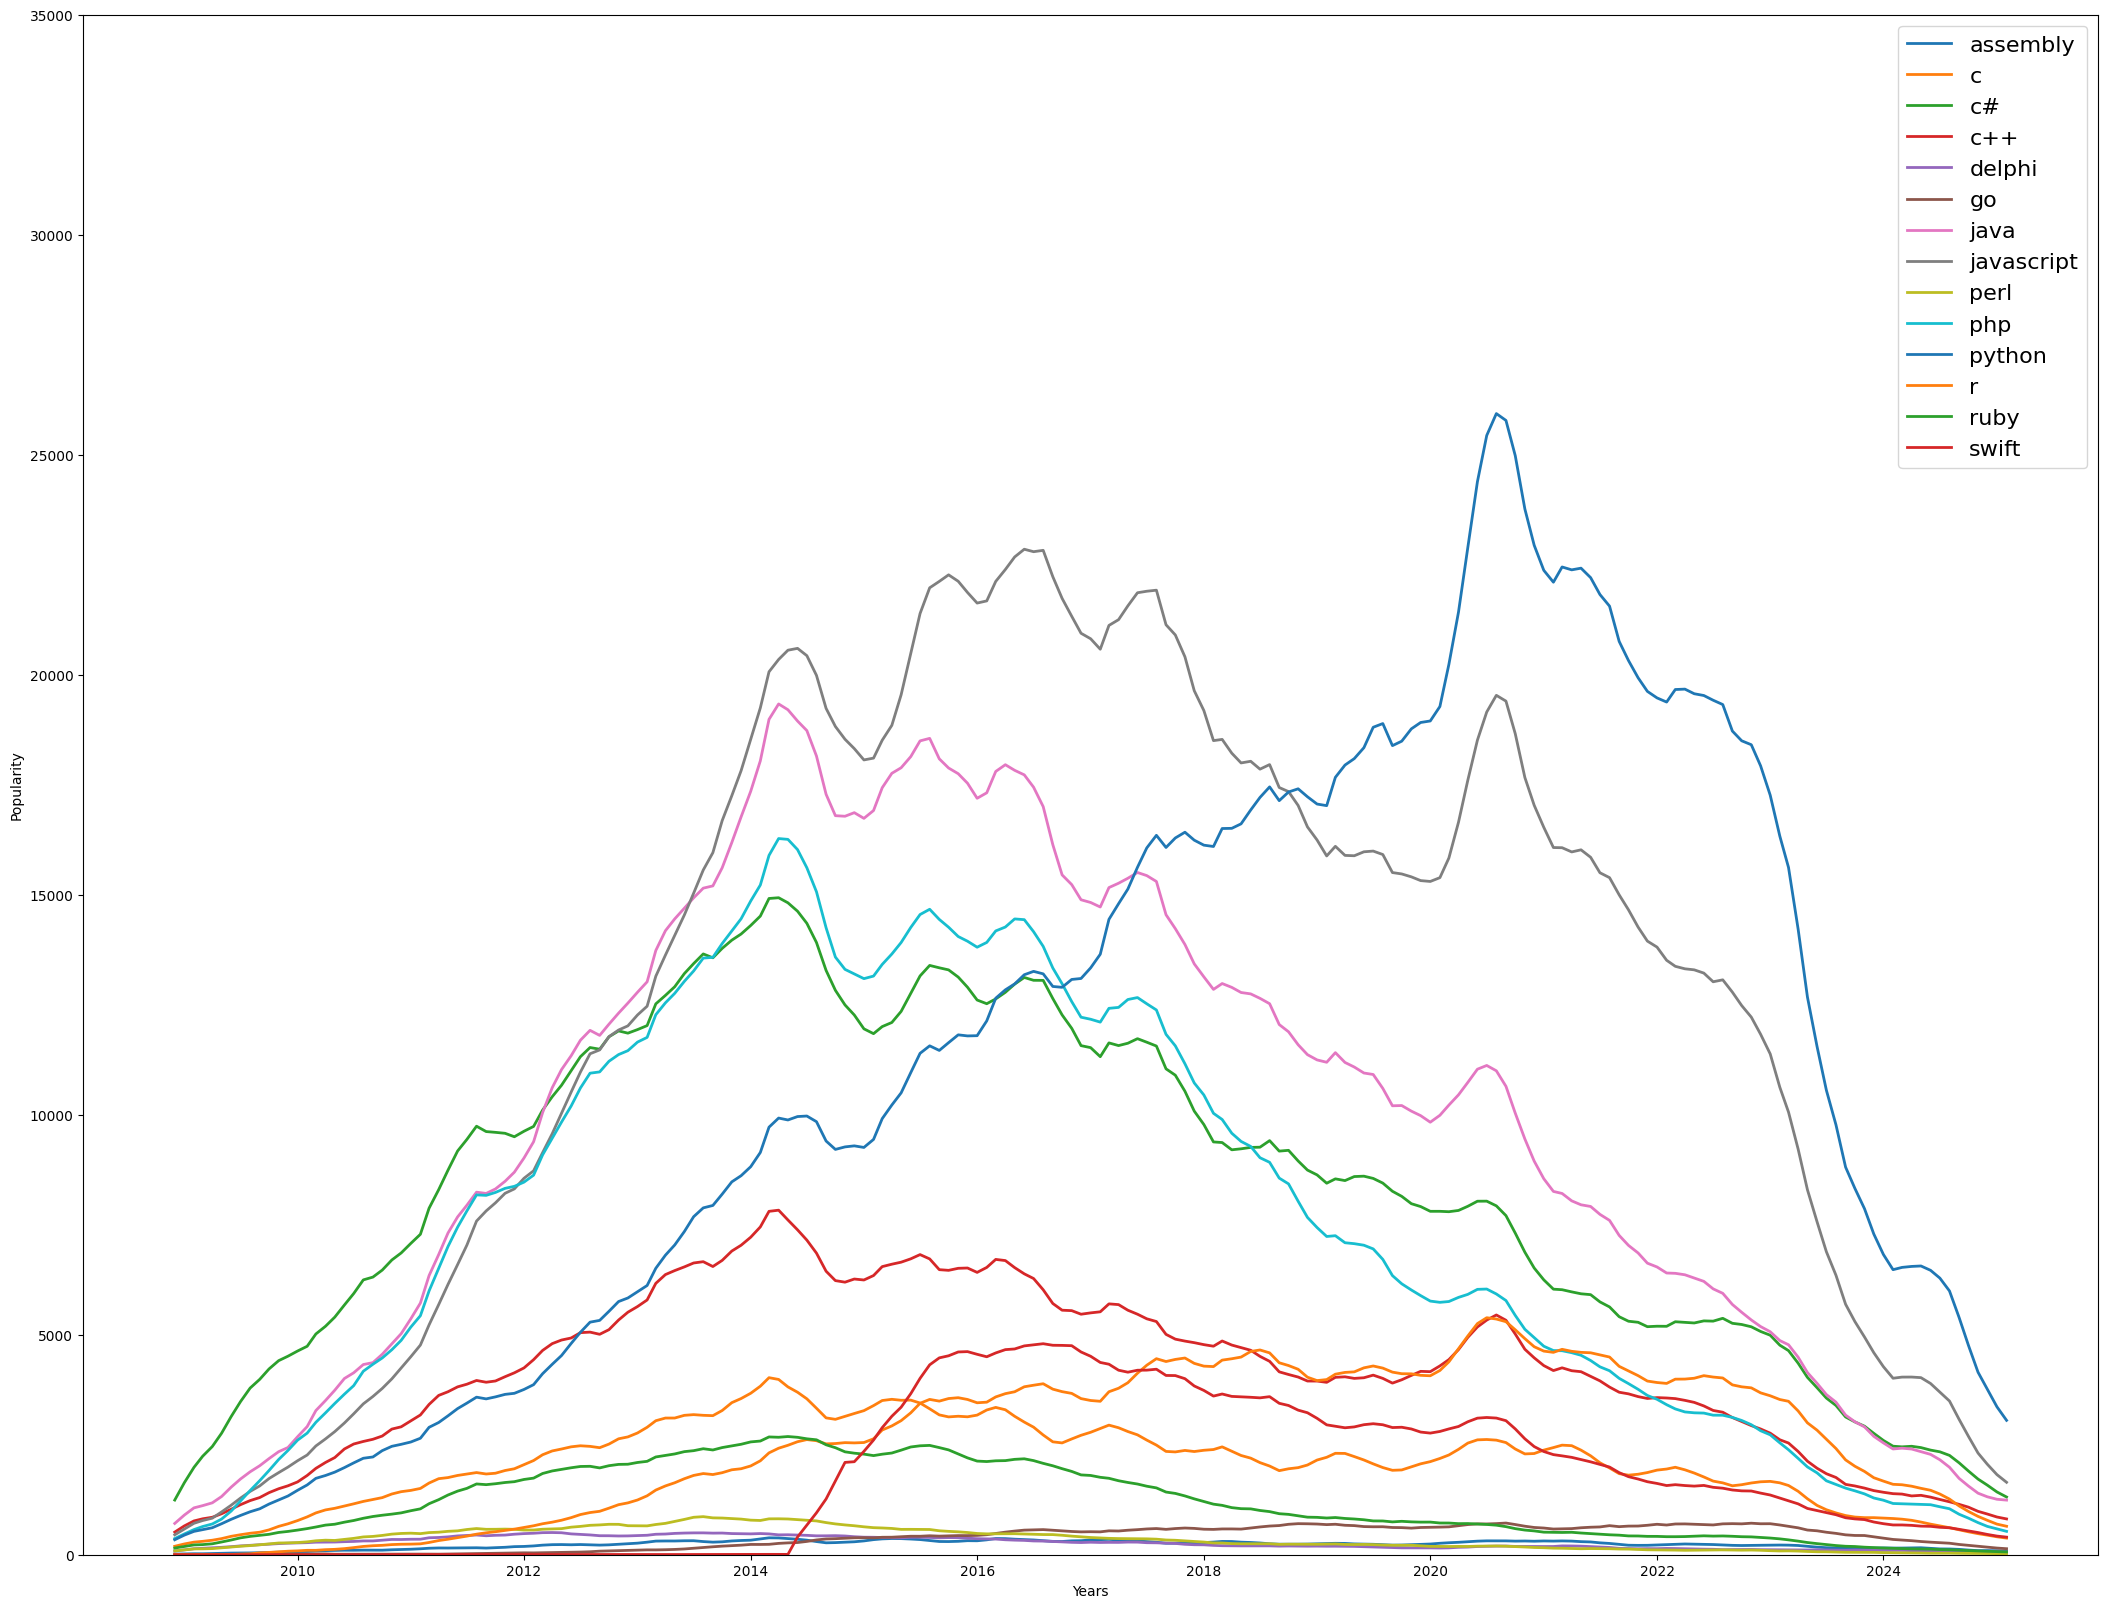

In [17]:

roll_df = reshaped_df.rolling(6).mean()
plt.figure(figsize=(26, 20))

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=2, label=roll_df[column].name)

plt.xlabel("Years")
plt.ylabel("Popularity")
plt.ylim(0, 35000)
plt.legend(fontsize=16)
print(roll_df)
